In [1]:
#loading data set
from sklearn import datasets
iris = datasets.load_iris()

In [2]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [3]:
print(iris.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [4]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
x=iris.data
y=iris.target

In [6]:
x.shape


(150, 4)

In [7]:
#pca analysis
from sklearn.preprocessing import scale
from sklearn import decomposition
import pandas as pd

In [8]:
X=scale(x)

In [9]:
pca=decomposition.PCA(n_components=3)
pca.fit(X)

PCA(n_components=3)

In [10]:
scores=pca.transform(X)

In [11]:
scores_df=pd.DataFrame(scores,columns=[f"PC{i+1}" for i in range(scores.shape[1])])
scores_df

,PC1,PC2,PC3
0,-2.264703,0.480027,-0.127706
1,-2.080961,-0.674134,-0.234609
2,-2.364229,-0.341908,0.044201
3,-2.299384,-0.597395,0.091290
4,-2.389842,0.646835,0.015738
...,...,...,...
145,1.870503,0.386966,0.256274
146,1.564580,-0.896687,-0.026371
147,1.521170,0.269069,0.180178
148,1.372788,1.011254,0.933395


In [12]:
Y_label=[]
for i in y:
    if i==0:
        Y_label.append("setosa")
    elif i==1:
        Y_label.append("versicolor")
    else:
        Y_label.append("virginica")

In [13]:
species=pd.DataFrame(Y_label,columns=["species"])
species

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa
...,...
145,virginica
146,virginica
147,virginica
148,virginica


In [14]:
df_scores=pd.concat([scores_df,species],axis=1)
df_scores

,PC1,PC2,PC3,species
0,-2.264703,0.480027,-0.127706,setosa
1,-2.080961,-0.674134,-0.234609,setosa
2,-2.364229,-0.341908,0.044201,setosa
3,-2.299384,-0.597395,0.091290,setosa
4,-2.389842,0.646835,0.015738,setosa
...,...,...,...,...
145,1.870503,0.386966,0.256274,virginica
146,1.564580,-0.896687,-0.026371,virginica
147,1.521170,0.269069,0.180178,virginica
148,1.372788,1.011254,0.933395,virginica


In [15]:
loadings=pca.components_.T
df_loadings=pd.DataFrame(loadings,columns=[f"PC{i+1}" for i in range(loadings.shape[1])],index=iris.feature_names)
df_loadings
pca.components_

array([[ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654],
       [ 0.37741762,  0.92329566,  0.02449161,  0.06694199],
       [-0.71956635,  0.24438178,  0.14212637,  0.63427274]])

In [16]:
df_loadings


,PC1,PC2,PC3
sepal length (cm),0.521066,0.377418,-0.719566
sepal width (cm),-0.269347,0.923296,0.244382
petal length (cm),0.580413,0.024492,0.142126
petal width (cm),0.564857,0.066942,0.634273


In [17]:
explained_variance=pca.explained_variance_ratio_
explained_variance

array([0.72962445, 0.22850762, 0.03668922])

In [18]:
import matplotlib.pyplot as plt

In [19]:

    def plot_variance(pca):
      plt.figure(figsize=(8, 6))
      plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='-')
      plt.title('Explained Variance Ratio by Components')
      plt.xlabel('Number of Components')
      plt.ylabel('Explained Variance Ratio')
      plt.xticks(range(1, len(pca.explained_variance_ratio_) + 1))
      plt.grid(True)
      plt.show()

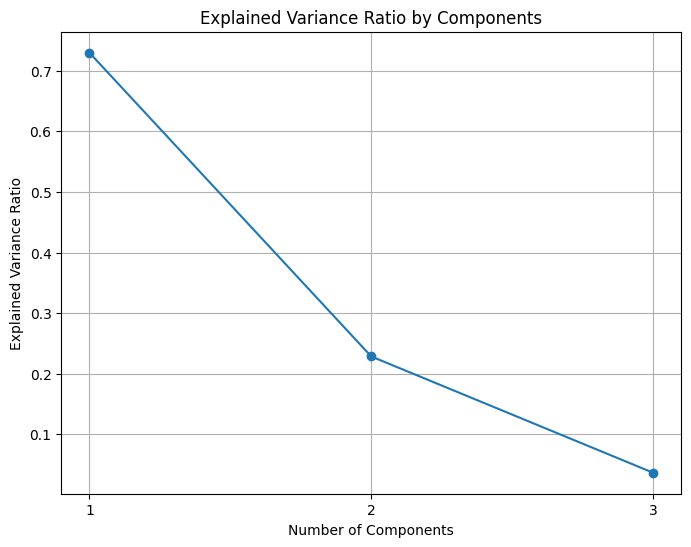

In [20]:
plot_variance(pca)

In [21]:
#scree plot
import numpy as np
import plotly.express as px

In [22]:
explained_variance

array([0.72962445, 0.22850762, 0.03668922])

In [26]:
explained_variance=np.insert(explained_variance, 0,0)

In [27]:
cumulative_variance=np.cumsum(np.round(explained_variance,decimals=3))
cumulative_variance

array([0.   , 0.73 , 0.959, 0.996])

In [28]:
pc_df=pd.DataFrame(["","PC1","PC2","PC3"],columns=["PC"])
pc_df
explained_variance_df=pd.DataFrame(explained_variance,columns=["Explained Variance"])
explained_variance_df
cumulative_variance_df=pd.DataFrame(cumulative_variance,columns=["Cumulative Variance"])
cumulative_variance_df

,Cumulative Variance
0,0.000
1,0.730
2,0.959
3,0.996


In [29]:
df_explained_variance=pd.concat([pc_df,explained_variance_df,cumulative_variance_df],axis=1)
df_explained_variance

,PC,Explained Variance,Cumulative Variance
0,,0.000000,0.000
1,PC1,0.729624,0.730
2,PC2,0.228508,0.959
3,PC3,0.036689,0.996


In [30]:
fig=px.bar(df_explained_variance,x='PC',y='Explained Variance',text='Explained Variance',width=800)
fig.update_traces(texttemplate='%{text:.3f}',textposition='inside')
fig.show()

In [31]:
import plotly.graph_objects as go
fig=go.Figure()
fig.add_trace(
    go.Scatter(
        x=df_explained_variance['PC'],
        y=df_explained_variance['Cumulative Variance'],
        marker=dict(size=10,color="LightSeaGreen"),
        name="cumulative Variance"
    )
)
fig.add_trace(
    go.Bar(x=df_explained_variance['PC'],
           y=df_explained_variance['Explained Variance'],
           marker=dict(color="RoyalBlue"),
           name="Explained Variance")
)

fig.show()

In [35]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
fig=make_subplots(rows=1,cols=2,subplot_titles=("Cumulative Variance","Explained Variance"))
fig.add_trace(
    go.Scatter(
        x=df_explained_variance['PC'],
        y=df_explained_variance['Cumulative Variance'],
        marker=dict(size=10,color="LightSeaGreen"),
        name="cumulative Variance"
    ),row=1,col=1
)
fig.add_trace(
    go.Bar(x=df_explained_variance['PC'],
           y=df_explained_variance['Explained Variance'],
           marker=dict(color="RoyalBlue"),
           name="Explained Variance"),row=1,col=2
)

fig.show()

In [36]:
#scores plot
import plotly.express as px

In [40]:
fig=px.scatter_3d(df_scores,x='PC1',y='PC2',z='PC3',color='species',symbol='species',opacity=0.5)
fig.update_layout(template='plotly_dark')

In [42]:
#loadings_plot
loadings_label=df_loadings.index
fig=px.scatter_3d(df_loadings,x='PC1',y='PC2',z='PC3',text=loadings_label)
fig.show()